In [1]:
# алгоритм k ближайших соседей

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

seaborn.set()

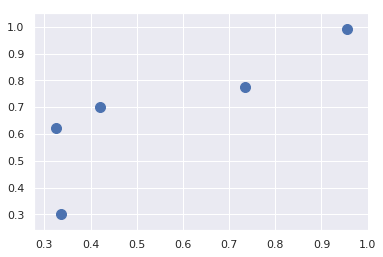

In [3]:
# генерируем данные вершин
n = 5
X = np.random.rand(n,2)
plt.scatter(X[:,0], X[:,1], s=100)

In [4]:
# вычисляем матрицу квадратов расстояний
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1)
dist_sq

array([[0.        , 0.53350288, 0.36986993, 0.09604257, 0.86091443],
       [0.53350288, 0.        , 0.01545693, 0.19086893, 0.10266603],
       [0.36986993, 0.01545693, 0.        , 0.10403184, 0.16746632],
       [0.09604257, 0.19086893, 0.10403184, 0.        , 0.38282668],
       [0.86091443, 0.10266603, 0.16746632, 0.38282668, 0.        ]])

In [5]:
# диагональная матрица должна быть равно 0
dist_sq.diagonal()

array([0., 0., 0., 0., 0.])

In [6]:
#  
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)
nearest_partition

array([[3, 0, 2, 1, 4],
       [1, 2, 4, 3, 0],
       [3, 2, 1, 4, 0],
       [3, 0, 2, 1, 4],
       [1, 4, 2, 3, 0]])

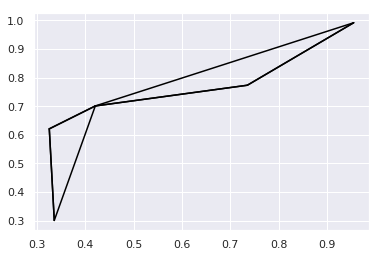

In [7]:
# связываем каждую точку с ее ближайшими двумя соседями
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[j], X[i]), color='black')